In [79]:
from keras.datasets import imdb

In [80]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [81]:
import numpy as np

def vectorize_sequences(sequences, demension=10000):
    results = np.zeros((len(sequences), demension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

vectorized_train_data = vectorize_sequences(train_data)
vectorized_test_data = vectorize_sequences(test_data)
vectorized_train_labels = np.asarray(train_labels).astype('float32')
vectorized_test_labels = np.asarray(test_labels).astype('float32')

In [82]:
from tensorflow.python.keras import models
from tensorflow.python.keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(8, activation='relu', input_shape=(vectorized_train_data.shape[1],)))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = 'rmsprop',
                  loss = 'binary_crossentropy',
                  metrics = ['acc']
                 )
    return model

In [83]:
vec_partial_train_data = vectorized_train_data[ : 15000]
vec_partial_test_data = vectorized_train_data[15000 : ]
vec_partial_train_labels = vectorized_train_labels[ : 15000]
vec_partial_test_labels = vectorized_train_data[15000 : ]

In [84]:
k = 3
num_val_samples = len(vec_partial_train_data) // k
num_epochs = 20

all_loss_histories = []
all_acc_histories = []
all_val_loss_histories = []
all_val_acc_histories = []

print(num_val_samples)

for i in range(k):
    print(i + 1, '번째 실행중')
    val_data = vec_partial_train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = vec_partial_train_labels[i * num_val_samples : (i + 1) * num_val_samples]
    
    kfold_partial_train_data = np.concatenate(
    [
        vec_partial_train_data[ : i * num_val_samples],
        vec_partial_train_data[(i+1) * num_val_samples: ]
    ], axis = 0)
    
    kfold_partial_train_labels = np.concatenate(
    [
        vec_partial_train_labels[ : i * num_val_samples],
        vec_partial_train_labels[(i+1) * num_val_samples: ]
    ], axis = 0)
    
    print(kfold_partial_train_data)
    print(kfold_partial_train_labels)
    
    
    model = build_model()
    history = model.fit(kfold_partial_train_data,
                        kfold_partial_train_labels,
                        epochs = num_epochs,
                        batch_size = 512,
                        validation_data = (val_data, val_targets))
    
    all_loss_histories.append(history.history['loss'])
    all_acc_histories.append(history.history['acc'])
    all_val_loss_histories.append(history.history['val_loss'])
    all_val_acc_histories.append(history.history['val_acc'])
    
    
    

5000
1 번째 실행중
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[0. 1. 0. ... 0. 0. 0.]
Train on 10000 samples, validate on 5000 samples
Epoch 1/20
10000/10000 [==============================] - 2s 165us/sample - loss: 0.5749 - acc: 0.7531 - val_loss: 0.4703 - val_acc: 0.8548
Epoch 2/20
10000/10000 [==============================] - 1s 68us/sample - loss: 0.3915 - acc: 0.8931 - val_loss: 0.3838 - val_acc: 0.8664
Epoch 3/20
10000/10000 [==============================] - 1s 66us/sample - loss: 0.2995 - acc: 0.9211 - val_loss: 0.3461 - val_acc: 0.8686
Epoch 4/20
10000/10000 [==============================] - 1s 67us/sample - loss: 0.2428 - acc: 0.9357 - val_loss: 0.3122 - val_acc: 0.8804
Epoch 5/20
10000/10000 [==============================] - 1s 67us/sample - loss: 0.1998 - acc: 0.9469 - val_loss: 0.2978 - val_acc: 0.8838
Epoch 6/20
10000/10000 [==============================] - 1s 

10000/10000 [==============================] - 1s 62us/sample - loss: 0.0337 - acc: 0.9958 - val_loss: 0.4203 - val_acc: 0.8662
Epoch 15/20
10000/10000 [==============================] - 1s 61us/sample - loss: 0.0285 - acc: 0.9959 - val_loss: 0.4221 - val_acc: 0.8680
Epoch 16/20
10000/10000 [==============================] - 1s 61us/sample - loss: 0.0217 - acc: 0.9974 - val_loss: 0.4893 - val_acc: 0.8604
Epoch 17/20
10000/10000 [==============================] - 1s 61us/sample - loss: 0.0184 - acc: 0.9978 - val_loss: 0.4720 - val_acc: 0.8656
Epoch 18/20
10000/10000 [==============================] - 1s 61us/sample - loss: 0.0146 - acc: 0.9988 - val_loss: 0.5059 - val_acc: 0.8654
Epoch 19/20
10000/10000 [==============================] - 1s 62us/sample - loss: 0.0119 - acc: 0.9987 - val_loss: 0.5299 - val_acc: 0.8652
Epoch 20/20
10000/10000 [==============================] - 1s 63us/sample - loss: 0.0091 - acc: 0.9992 - val_loss: 0.5619 - val_acc: 0.8638


In [85]:
average_acc_history = [
    np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)
]

average_loss_history = [
    np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)
]

average_val_acc_history = [
    np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)
]

average_val_loss_history = [
    np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)
]

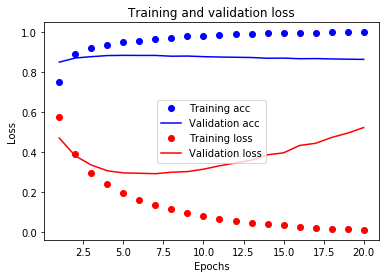

In [86]:
import matplotlib.pyplot as plt


epochs = range(1, len(average_acc_history)+1)

plt.plot(epochs, average_acc_history, 'bo', label='Training acc')
plt.plot(epochs, average_val_acc_history, 'b', label="Validation acc")
plt.plot(epochs, average_loss_history, 'ro', label="Training loss")
plt.plot(epochs, average_val_loss_history, 'r', label="Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()